<a href="https://colab.research.google.com/github/Aqillaaprly/Rakamin_FinalProject_DS59/blob/Jason/Grup_2_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [ ]:
df = pd.read_csv("recruitment_efficiency_improved.csv")
df.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79


In [ ]:
print('----STRUKTUR DATA----')

df.info()

print(df.isnull().sum())

df.duplicated().sum()

----STRUKTUR DATA----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recruitment_id         5000 non-null   int64  
 1   department             5000 non-null   object 
 2   job_title              5000 non-null   object 
 3   num_applicants         5000 non-null   int64  
 4   time_to_hire_days      5000 non-null   int64  
 5   cost_per_hire          5000 non-null   float64
 6   source                 5000 non-null   object 
 7   offer_acceptance_rate  5000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB
recruitment_id           0
department               0
job_title                0
num_applicants           0
time_to_hire_days        0
cost_per_hire            0
source                   0
offer_acceptance_rate    0
dtype: int64


np.int64(0)

In [ ]:
df.describe()

,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832
std,1443.520003,84.164264,23.864934,2730.999185,0.202052
min,1.000000,10.000000,7.000000,507.160000,0.300000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000


Struktur Data

- Jumlah baris: 5000
- Jumlah kolom: 8
- Jenis data: kombinasi object, int64, float64
- tidak ada missing value

In [ ]:
# Pisahkan fitur numerik, kategorikal

numerical_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']
categorical_cols = ['department', 'job_title', 'source']
targets = ['time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

print("Kolom Numerik:")
print(numerical_cols)

print("\nKolom Kategorikal:")
print(categorical_cols)

Kolom Numerik:
['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

Kolom Kategorikal:
['department', 'job_title', 'source']


Univariate Analysis

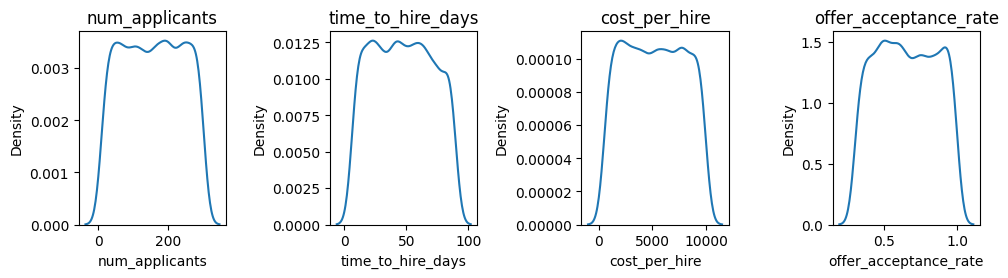

In [ ]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # 4 rows, 4 columns
    sns.kdeplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()

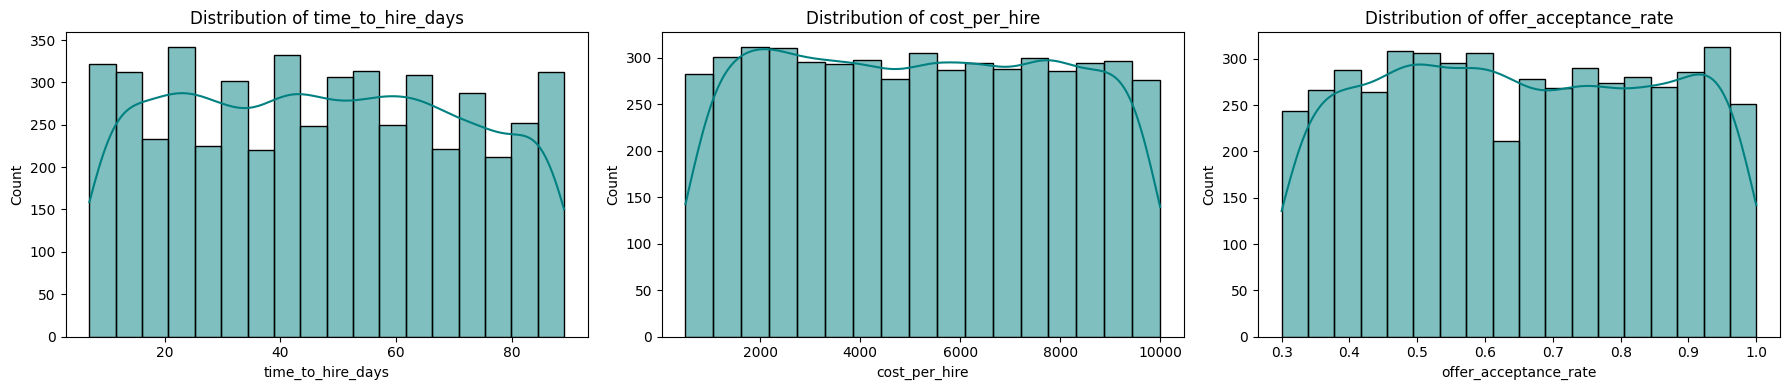

       time_to_hire_days  cost_per_hire  offer_acceptance_rate
count        5000.000000    5000.000000            5000.000000
mean           47.191400    5214.826236               0.650832
std            23.864934    2730.999185               0.202052
min             7.000000     507.160000               0.300000
25%            26.000000    2820.597500               0.480000
50%            47.000000    5218.290000               0.650000
75%            67.000000    7611.412500               0.830000
max            89.000000    9998.910000               1.000000


In [ ]:
# Buat 1 baris dengan 3 grafik
fig, axes = plt.subplots(1, len(targets), figsize=(18, 4))

for i, col in enumerate(targets):
    sns.histplot(df[col], kde=True, color='teal', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Statistik deskriptif
print(df[targets].describe())

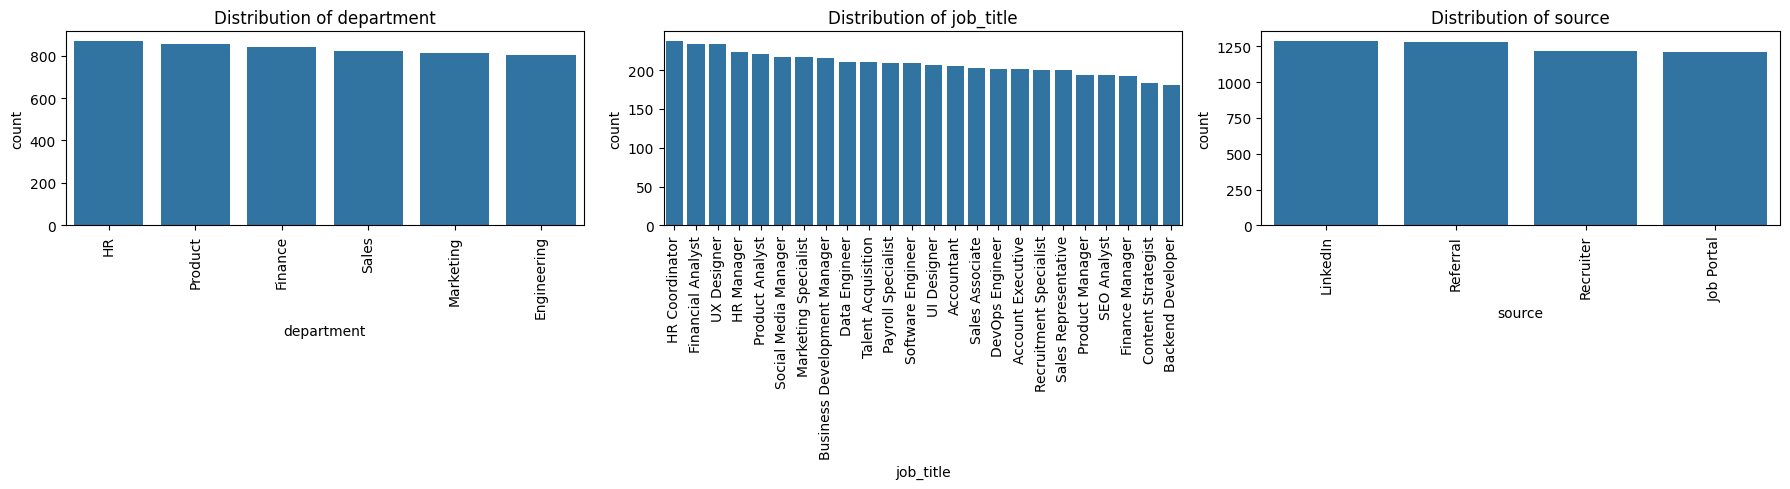

In [ ]:
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('count')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Bivariate Analysis

/tmp/ipython-input-1168764527.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-1168764527.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-1168764527.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])


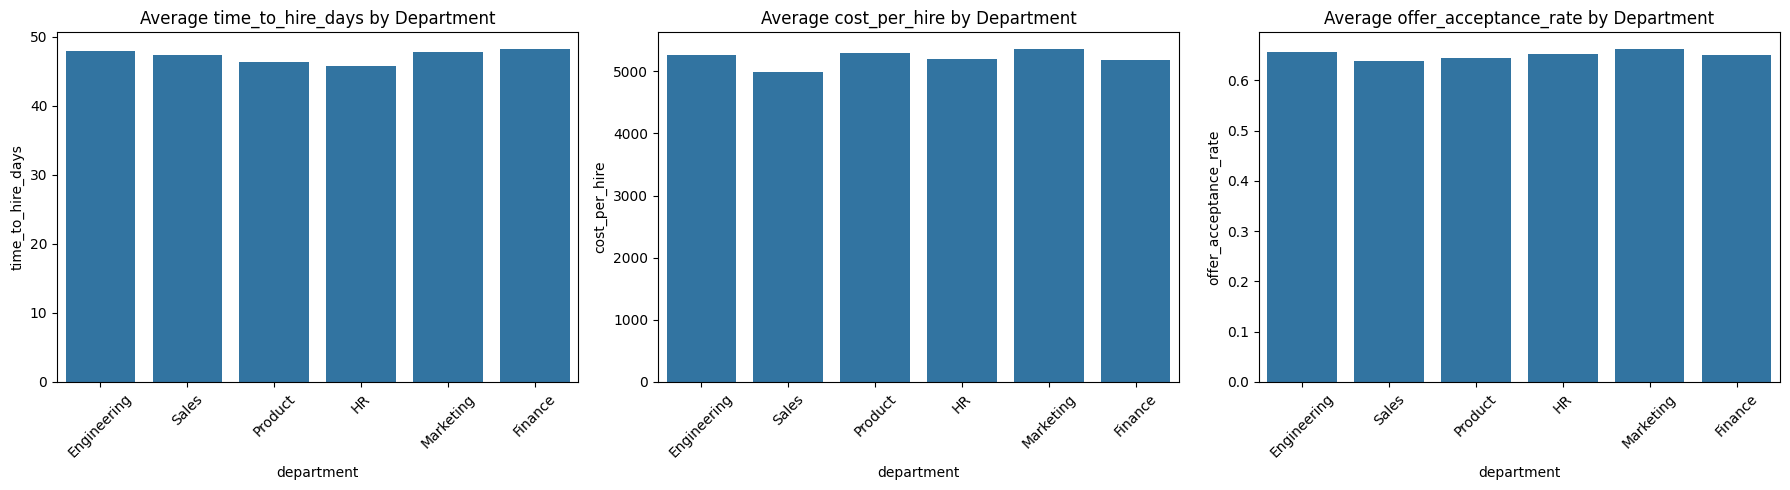

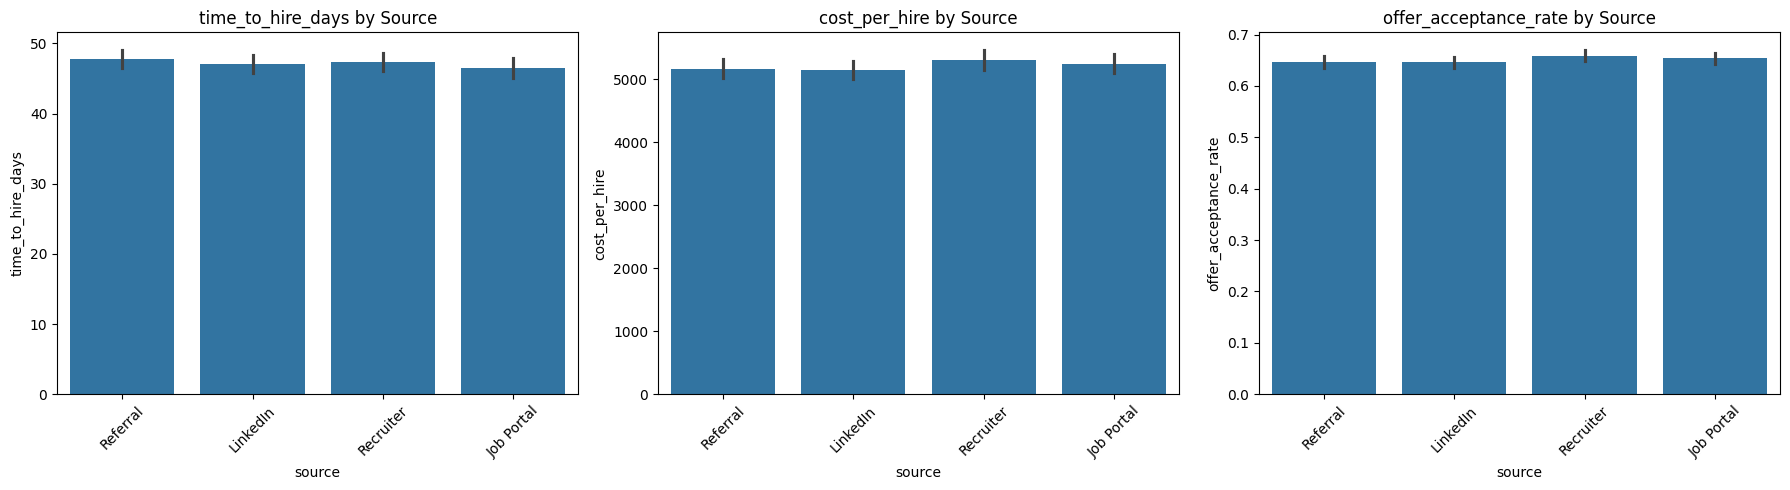

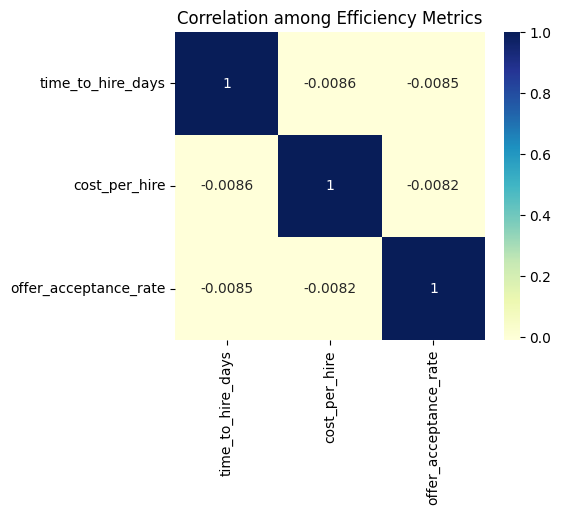

In [ ]:

# 1.Department vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f'Average {col} by Department')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 2. Source vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='source', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Source')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 3️. Korelasi antar target
plt.figure(figsize=(5,4))
sns.heatmap(df[targets].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation among Efficiency Metrics')
plt.show()

Multivariate Analysis

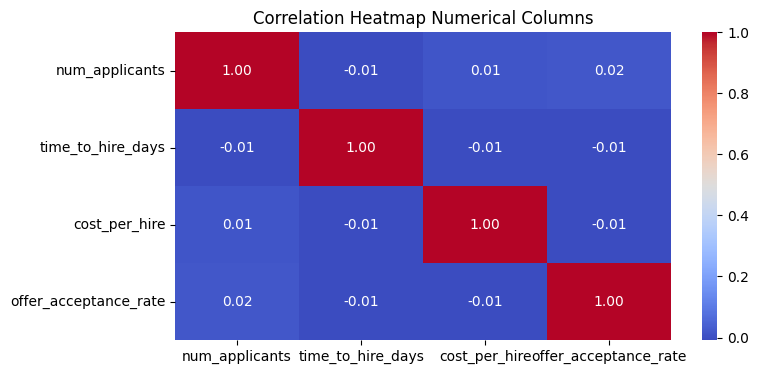

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df[numerical_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap Numerical Columns")
plt.show()

Cek Outlier pada Data Numerik

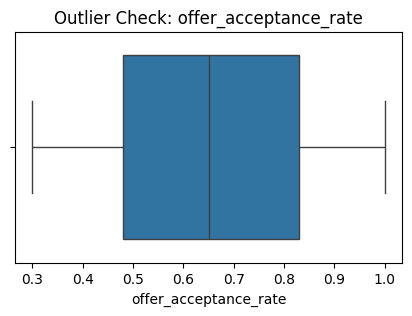

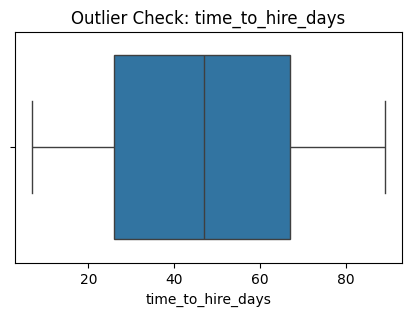

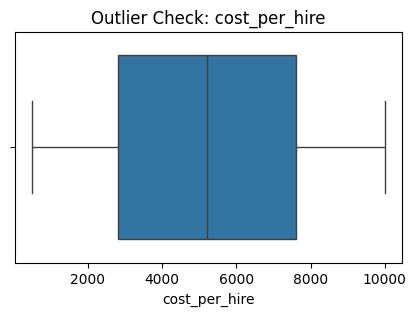

In [ ]:

# Visualisasi boxplot untuk mendeteksi outlier
for col in targets:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Check: {col}')
    plt.show()

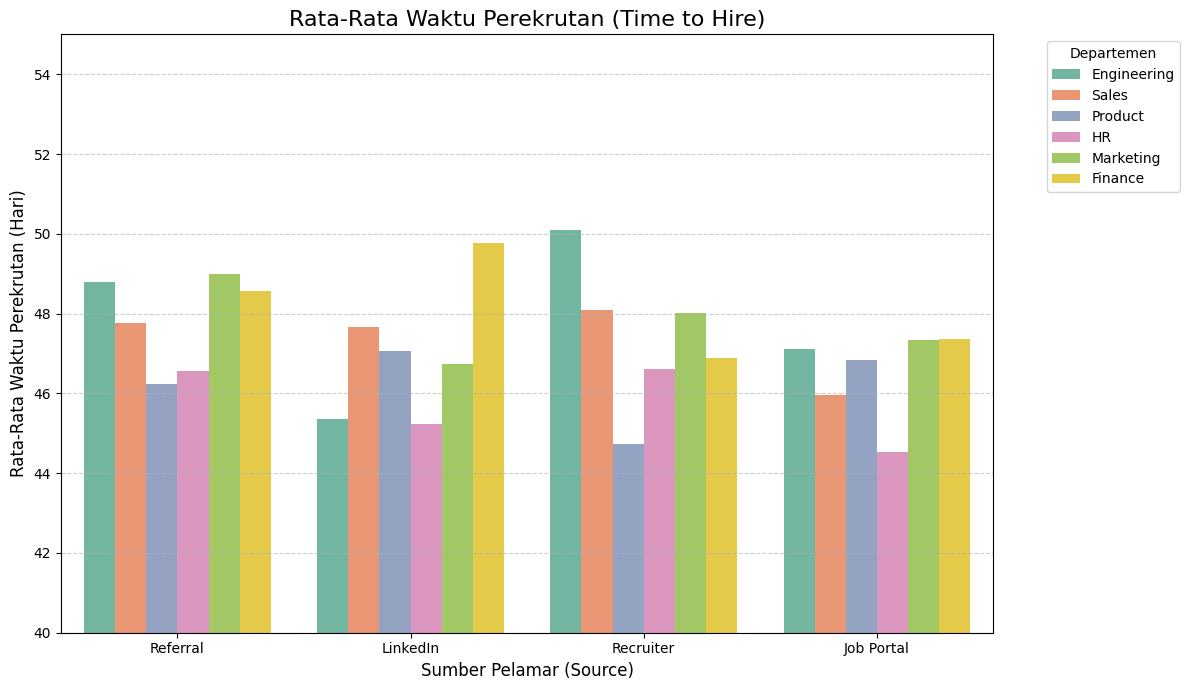

In [ ]:
# Membuat Plot time to hire
plt.figure(figsize=(12, 7))

sns.barplot(
    data=df,
    x='source',
    y='time_to_hire_days',
    hue='department',
    palette='Set2',
    errorbar=None
)

# Mengatur batas sumbu Y: minimum 45 dan maksimum 55
plt.ylim(40, 55)

# Menambahkan detail plot
plt.title('Rata-Rata Waktu Perekrutan (Time to Hire)', fontsize=16)
plt.xlabel('Sumber Pelamar (Source)', fontsize=12)
plt.ylabel('Rata-Rata Waktu Perekrutan (Hari)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

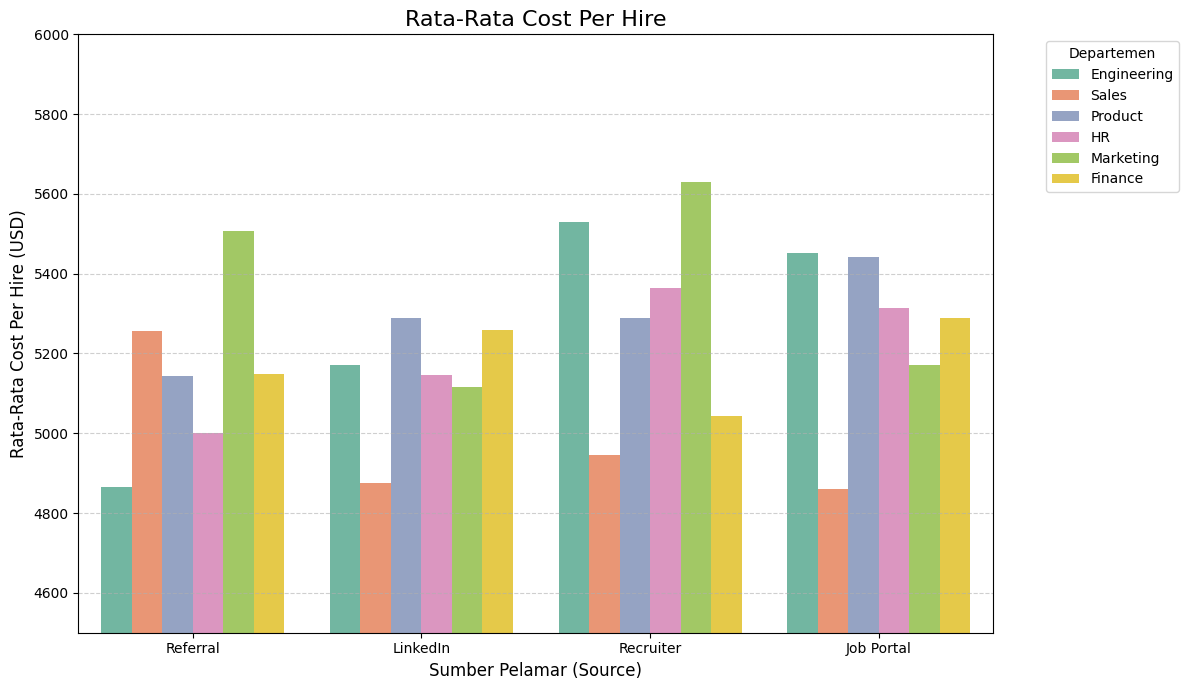

In [ ]:
# Membuat Plot Cost Per Hire
plt.figure(figsize=(12, 7))

sns.barplot(
    data=df,
    x='source',
    y='cost_per_hire',
    hue='department',
    palette='Set2',
    errorbar=None
)

# Mengatur batas sumbu Y: minimum 4500 dan maksimum 6000
plt.ylim(4500, 6000)

# Menambahkan detail plot
plt.title('Rata-Rata Cost Per Hire', fontsize=16)
plt.xlabel('Sumber Pelamar (Source)', fontsize=12)
plt.ylabel('Rata-Rata Cost Per Hire (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

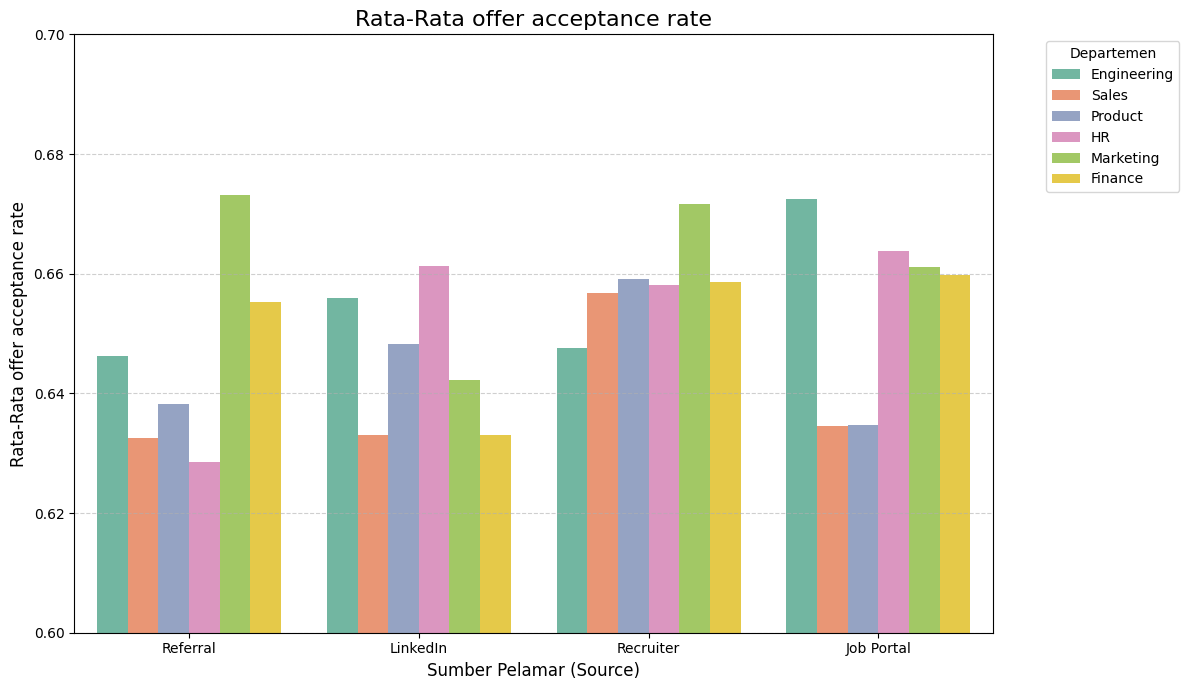

In [ ]:
# Membuat Plot Offer Acceptance Rate
plt.figure(figsize=(12, 7))

sns.barplot(
    data=df,
    x='source',
    y='offer_acceptance_rate',
    hue='department',
    palette='Set2',
    errorbar=None
)

# Mengatur batas sumbu Y: minimum 0.6 dan maksimum 0.7
plt.ylim(0.6, 0.7)

# Menambahkan detail plot
plt.title('Rata-Rata offer acceptance rate', fontsize=16)
plt.xlabel('Sumber Pelamar (Source)', fontsize=12)
plt.ylabel('Rata-Rata offer acceptance rate', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Departemen', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()